# GloVe: Global Vectors for Word Representation
## Example of usage in Python
url: https://nlp.stanford.edu/projects/glove/

## Open GloVe text file and import to NumPy

In [1]:
import numpy as np
import codecs
glove_vectors = 'myglove.6B.50d.txt'
filecp = codecs.open(glove_vectors, encoding = 'utf-8')
glove = np.loadtxt(filecp, dtype='str', comments=None)

# Extract the vectors and words
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]

# Create lookup of words to vectors
word_lookup = {word: vector for word, vector in zip(words, vectors)}

# New matrix to hold word embeddings
#embedding_matrix = np.zeros((num_words, vectors.shape[1]))
print("Loaded",len(word_lookup.keys()),'vectors')

Loaded 399946 vectors


## Check contents

In [2]:
print(word_lookup['chair'])
print(word_lookup['chair'].shape)

[-1.0443e+00  4.9202e-01 -7.5978e-01 -3.9224e-01  8.1217e-01 -3.9287e-02
  1.6706e-02 -6.8629e-01 -7.8359e-02 -1.3214e+00 -1.5354e-01  2.0438e-01
 -4.6503e-01  1.2145e+00 -1.8217e-01  2.7451e-01 -2.4086e-01  7.1145e-01
  3.2470e-01 -7.1320e-01  6.6721e-01  7.1307e-01 -1.0394e-01 -3.8439e-01
 -2.0260e-01 -1.4419e+00  4.2644e-01  5.9436e-01 -1.3615e+00  1.3784e-03
  1.8734e+00 -1.1334e-01 -8.8115e-01 -2.1715e-01 -5.6606e-01  1.4152e-01
  2.7673e-01  9.9962e-01  1.0567e+00 -2.9428e-01 -3.1390e-01  1.2729e-01
 -5.4363e-01  3.9652e-01 -3.2527e-01  3.0536e-01  1.5128e-01 -1.0889e+00
 -2.0867e-01 -5.2605e-02]
(50,)


## Define functions that compare vectors using Euclidean distance or cosine between vectors

In [3]:
from scipy import spatial
def find_closest_embeddings_euc(embedding):
    return sorted(word_lookup.keys(), 
                  key=lambda word: spatial.distance.euclidean(word_lookup[word], word_lookup[embedding]))

def find_closest_embeddings_cos(embedding):
    return sorted(word_lookup.keys(), 
                  key=lambda word: spatial.distance.cosine(word_lookup[word], word_lookup[embedding]))


## Use the function to fing closest words to the given word

In [4]:
u = word_lookup['eye']
v = word_lookup['eyes']

print("Euclidean",find_closest_embeddings_euc('eye')[:10])
print("Cosine",find_closest_embeddings_cos('eye')[:10])

Euclidean ['eye', 'eyes', 'heart', 'chest', 'ear', 'nose', 'touch', 'seen', 'throat', 'blood']
Cosine ['eye', 'eyes', 'chest', 'heart', 'ear', 'nose', 'skin', 'blood', 'throat', 'mouth']


## Use PCA to map vectors into 2D space and show the plot

(9, 2)


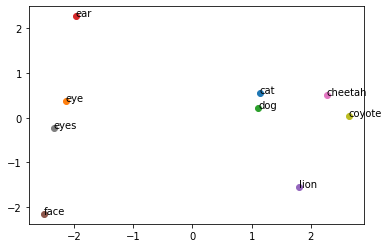

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['cat','eye','dog','ear','lion','face','cheetah','eyes','coyote']
vectors = []
for w in words:
    vectors.append(word_lookup[w])
vectors = np.array(vectors)
pca = PCA(n_components=2)
pca.fit(vectors)
vectors2D = pca.transform(vectors)
print(vectors2D.shape)
for i,w in enumerate(words):
    plt.scatter(vectors2D[i,0],vectors2D[i,1])
    plt.annotate(w,(vectors2D[i,0],vectors2D[i,1]))